In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns
import numpy as np

In [63]:
import joblib as jb

### Load data

In [3]:
data = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\data\clean\clean_data_2.parquet'

In [4]:
df = pd.read_parquet(data)

In [5]:
df.head(3)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,15000


### dummy columns

In [6]:
label_brand = LabelEncoder()
label_model = LabelEncoder()
label_fuel = LabelEncoder()
label_engine = LabelEncoder()
label_trans = LabelEncoder()
label_ext_col = LabelEncoder()
label_ext_int = LabelEncoder()
label_accident = LabelEncoder()

In [8]:
beta = ['price', 'engine', 'accident', 'milage', 'model_year']

In [37]:
df1 =df[beta].copy()

In [38]:
#df1['brand'] = label_brand.fit_transform(df['brand'])
#df1['model'] = label_brand.fit_transform(df['model'])
#df1['fuel_type'] = label_fuel.fit_transform(df['fuel_type'])
df1['engine'] = label_engine.fit_transform(df['engine'])
#df1['transmission'] = label_trans.fit_transform(df['transmission'])
#df1['ext_col'] = label_ext_col.fit_transform(df['ext_col'])
#df1['int_col'] = label_ext_int.fit_transform(df['int_col'])
df1['accident'] = label_accident.fit_transform(df['accident'])

In [64]:
jb.dump(label_engine, 'label_engine.pkl')
jb.dump(label_accident, 'label_accident.pkl')

['label_accident.pkl']

In [39]:
df1.head(5)

,price,engine,accident,milage,model_year
0,11000,719,1,74349,2018
1,8250,534,1,80000,2007
2,15000,541,1,91491,2009
3,63500,646,1,2437,2022
4,7850,219,1,111000,2001


In [40]:
df1.describe()

,price,engine,accident,milage,model_year
count,5.427300e+04,54273.000000,54273.000000,54273.000000,54273.000000
mean,3.921844e+04,565.570799,0.735098,72746.175667,2015.091979
std,7.282634e+04,262.411316,0.441285,50469.490448,5.588909
min,2.000000e+03,0.000000,0.000000,100.000000,1974.000000
25%,1.550000e+04,347.000000,0.000000,32268.000000,2012.000000
50%,2.800000e+04,582.000000,1.000000,66107.000000,2016.000000
75%,4.500000e+04,785.000000,1.000000,102000.000000,2019.000000
max,2.954083e+06,1060.000000,1.000000,405000.000000,2024.000000


In [41]:
df1 = df1[df1['milage'] < 250000]
df1 = df1[df1['price'] < 500000]
df1 = df1[df1['model_year'] > 1990]

### target 'price' distribution

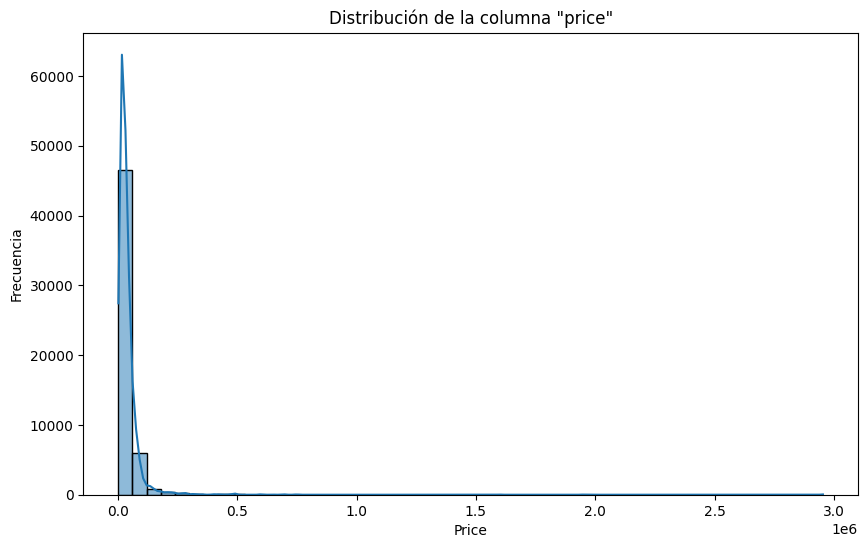

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de la columna "price"')
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.show()

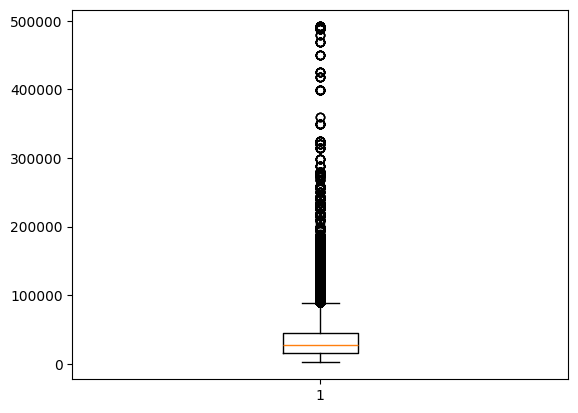

In [43]:
plt.boxplot(df1['price'])
plt.show()

In [44]:
df1['price_log'] = np.log1p(df['price'])

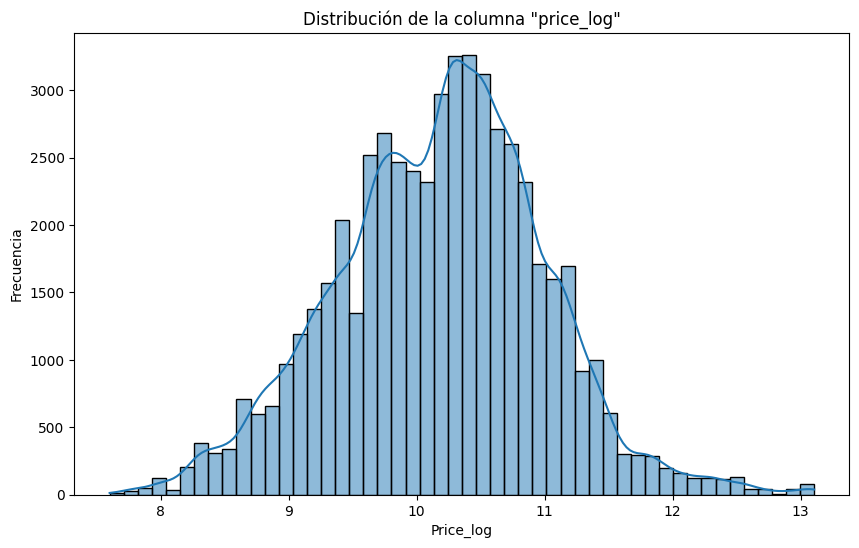

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df1['price_log'], bins=50, kde=True)
plt.title('Distribución de la columna "price_log"')
plt.xlabel('Price_log')
plt.ylabel('Frecuencia')
plt.show()

In [47]:
df1.pop('price')
df1.head(2)

,engine,accident,milage,model_year,price_log
0,719,1,74349,2018,9.305741
1,534,1,80000,2007,9.018090


In [49]:
df1['milage_ratio'] = df1['milage']/df1['model_year']
df1['delta'] = df1['engine'] + df1['accident']

In [50]:
df1.head(1)

,engine,accident,milage,model_year,price_log,milage_ratio,delta
0,719,1,74349,2018,9.305741,36.842914,720


### Feature 2

In [51]:
from sklearn.cluster import KMeans


In [52]:
inertia = []
k_range = range(1,11)

In [53]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df1[['delta','milage_ratio']])
    inertia.append(kmeans.inertia_)

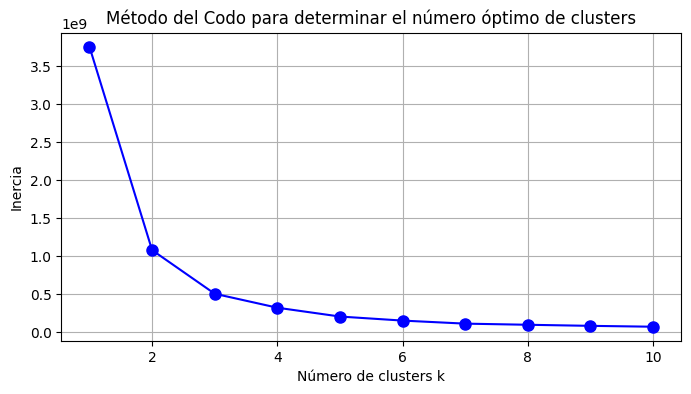

In [54]:
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-', markersize=8)
plt.xlabel('Número de clusters k')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.grid(True)
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3, random_state=0)
df1["Cluster"] = kmeans.fit_predict(df1[['engine','milage_ratio']])
df1["Cluster"] = df1["Cluster"].astype("category")
df1['Cluster'] = df1['Cluster'].cat.codes

df1.head()

,engine,accident,milage,model_year,price_log,milage_ratio,delta,Cluster
0,719,1,74349,2018,9.305741,36.842914,720,1
1,534,1,80000,2007,9.018090,39.860488,535,0
2,541,1,91491,2009,9.615872,45.540567,542,0
3,646,1,2437,2022,11.058811,1.205242,647,0
4,219,1,111000,2001,8.968396,55.472264,220,2


In [56]:
print(kmeans)

KMeans(n_clusters=3, random_state=0)


In [57]:
df1['Cluster'].info()

<class 'pandas.core.series.Series'>
Index: 54034 entries, 0 to 54272
Series name: Cluster
Non-Null Count  Dtype
--------------  -----
54034 non-null  int8 
dtypes: int8(1)
memory usage: 474.9 KB


In [58]:
import joblib as jb

In [59]:
jb.dump(kmeans,'kmeans_3_model.pkl')

['kmeans_3_model.pkl']

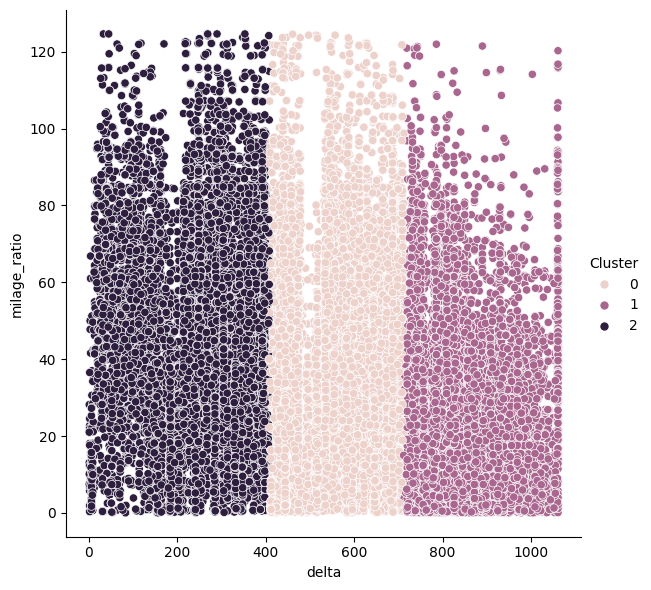

In [60]:
sns.relplot(
    x="delta", y="milage_ratio", hue="Cluster", data=df1, height=6,
)

In [61]:
df1.head(5)

,engine,accident,milage,model_year,price_log,milage_ratio,delta,Cluster
0,719,1,74349,2018,9.305741,36.842914,720,1
1,534,1,80000,2007,9.018090,39.860488,535,0
2,541,1,91491,2009,9.615872,45.540567,542,0
3,646,1,2437,2022,11.058811,1.205242,647,0
4,219,1,111000,2001,8.968396,55.472264,220,2


### feature engenieering

In [ ]:
# df1['milage_ratio'] = df1['milage']/df1['model_year']

In [ ]:
# df1.head(5)

In [ ]:
# df1['log_milage'] = np.log(df1['milage'])

In [ ]:
#discret years
# df1['years_range'] = pd.cut(df['model_year'], bins=[0,2010,2014,2015,2016,2017,2018,2024], labels=['modelo 0 a 2010', 'modelo 2010 a 2014', 'modelo 2014 a 2015', 'modelo 2015 a 2016', 'modelo 2016 a 2017', 'modelo 2017 a 2018','modelo 2018 a 2024'])

In [ ]:
# dummies = pd.get_dummies(df1['years_range'], dtype='int64')
# df1 = pd.concat([df1, dummies], axis=1)

In [ ]:
# del df1['years_range']

In [ ]:
# df1.head(2)

In [ ]:
# dummies = pd.get_dummies(df1['brand'], dtype='int64')
# df1 = pd.concat([df1, dummies], axis=1)

In [ ]:
# del df1['brand']

In [ ]:
# df1.head(2)

In [ ]:
# dummies = pd.get_dummies(df1['engine'], dtype='int64')
# df1 = pd.concat([df1, dummies], axis=1)

In [ ]:
# del df1['engine']

In [ ]:
# df1.head(2)

In [ ]:
# dummies = pd.get_dummies(df1['accident'], dtype='int64')
# df1 = pd.concat([df1, dummies], axis=1)
# del df1['accident']

In [ ]:
# df1.head(1)

### Export parquet file

In [62]:
path = r'D:\0_Respaldo\0_Proyectos_2024\ML_proyects\KagelX\KaggleX\booknotes\s1_t1\beta_data_03.parquet'
df1.to_parquet(path)